In [42]:
import pandas as pd
import datetime as dt
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
pd.options.display.max_rows = 5000 

In [2]:
import requests

url = "https://yahoo-finance15.p.rapidapi.com/api/yahoo/hi/history/ecr.l/1d"

headers = {
    'x-rapidapi-key': "9cd97ba3camsh244cbd2e3e420a4p1e83c0jsne0fdd0787f8e",
    'x-rapidapi-host': "yahoo-finance15.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers)

print(response.text)

{
    "meta": {
        "currency": "GBp",
        "symbol": "ECR.L",
        "exchangeName": "LSE",
        "instrumentType": "EQUITY",
        "firstTradeDate": 1077177600,
        "regularMarketTime": 1630660494,
        "gmtoffset": 3600,
        "timezone": "BST",
        "exchangeTimezoneName": "Europe/London",
        "regularMarketPrice": 1.95,
        "chartPreviousClose": 290,
        "priceHint": 4,
        "dataGranularity": "1d",
        "range": ""
    },
    "items": {
        "1315206000": {
            "date": "05-09-2011",
            "open": 274,
            "high": 278,
            "low": 263,
            "close": 270,
            "adjclose": 270
        },
        "1315292400": {
            "date": "06-09-2011",
            "open": 280,
            "high": 285,
            "low": 270.4,
            "close": 285,
            "adjclose": 285
        },
        "1315378800": {
            "date": "07-09-2011",
            "open": 293,
            "high": 293,
       

In [3]:
string = response.text

In [4]:
def get_dates(string):
    date = re.compile('"date":((.*),)')
    date = date.findall(string)
    date = [i[0][2:12] for i in date]
    date = [datetime.strptime(i, "%d-%m-%Y").strftime("%Y-%m-%d") for i in date]
    return date

In [5]:
date = get_dates(string)
print( date[:5] )

['2011-09-05', '2011-09-06', '2011-09-07', '2011-09-08', '2011-09-09']


In [6]:
def get_close(string):
    close = re.compile('"close":((.*),)')
    close = close.findall(string)
    close = [float(i[1].strip()) for i in close]
    return close

In [7]:
close = get_close(string)
close[:5]

[270.0, 285.0, 285.0, 275.0, 264.0]

In [8]:
print(len(close))
print(len(date[6:]))

2522
2522


In [9]:
ecr = pd.DataFrame({"date":date[6:], "ecr_close":close})
ecr.set_index('date', drop=True, inplace=True)
ecr.tail(3)

,ecr_close
date,
2021-09-01,1.67
2021-09-02,1.80
2021-09-03,1.95


In [36]:
p1_sprice = 0.5
p1_wprice = 1
p1_date = '2020-04-01'
p1_swratio = 1/1
p2_sprice = 1.3
p2_wprice = 2.1
p2_date = '2020-07-01'
p2_swratio = 1/1

avg_sprice = (p1_sprice + p2_sprice)/2
avg_wprice = (p1_wprice + p2_wprice)/2

In [11]:
ecr['p1_sprice'] = [p1_sprice if i  >= p1_date else None for i in ecr.index]
ecr['p1_wprice'] = [p1_wprice if i  >= p1_date else None for i in ecr.index]

ecr['p2_sprice'] = [p2_sprice if i  >= p2_date else None for i in ecr.index]
ecr['p2_wprice'] = [p2_wprice if i  >= p2_date else None for i in ecr.index]

In [29]:
# fund = 10000

# ecr['p1_sposition'] = [round(fund/p1_sprice,2) if i >= p1_date else 0 for i in ecr.index]
# ecr['p1_wposition'] = ecr['p1_sposition']*p1_swratio


# ecr['p2_sposition'] = [round(fund/p2_sprice,2) if i >= p2_date else 0 for i in ecr.index]
# ecr['p2_wposition'] = ecr['p2_sposition']*p2_swratio

- profit from price change and warranty

In [12]:
ecr['p1_sprft'] = ecr.ecr_close - ecr['p1_sprice']


ecr['p2_sprft'] = ecr.ecr_close - ecr['p2_sprice']

In [13]:

p1_wprofit = []
for i,j in zip(ecr.ecr_close, ecr['p1_wprice']):
    if i - j >0:
        p1_wprofit.append(round(i-j,2))
    else:
        p1_wprofit.append(0)

ecr['p1_wprft'] = p1_wprofit

p2_wprofit = []
for i,j in zip(ecr.ecr_close, ecr['p2_wprice']):
    if i - j >0:
        p2_wprofit.append(round(i-j,2))
    else:
        p2_wprofit.append(0)

ecr['p2_wprft'] = p2_wprofit

In [14]:
ecr = ecr.fillna(0)
ecr

,ecr_close,p1_sprice,p1_wprice,p2_sprice,p2_wprice,p1_sprft,p2_sprft,p1_wprft,p2_wprft
date,,,,,,,,,
2011-09-13,270.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
2011-09-14,285.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
2011-09-15,285.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
2011-09-16,275.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
2011-09-19,264.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
2011-09-20,265.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
2011-09-21,265.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
2011-09-22,265.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
2011-09-23,290.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00


In [15]:
ecr['avg_prft_ps'] = (ecr['p1_sprft']+ecr['p2_sprft']+ecr['p1_wprft']+ecr['p2_wprft'])/2

In [16]:
ecr['avg_prft_on_sprice'] = ecr['ecr_close'] +ecr['avg_prft_ps']

In [17]:
ecr

,ecr_close,p1_sprice,p1_wprice,p2_sprice,p2_wprice,p1_sprft,p2_sprft,p1_wprft,p2_wprft,avg_prft_ps,avg_prft_on_sprice
date,,,,,,,,,,,
2011-09-13,270.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,270.000
2011-09-14,285.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,285.000
2011-09-15,285.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,285.000
2011-09-16,275.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,275.000
2011-09-19,264.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,264.000
2011-09-20,265.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,265.000
2011-09-21,265.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,265.000
2011-09-22,265.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,265.000
2011-09-23,290.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000,290.000


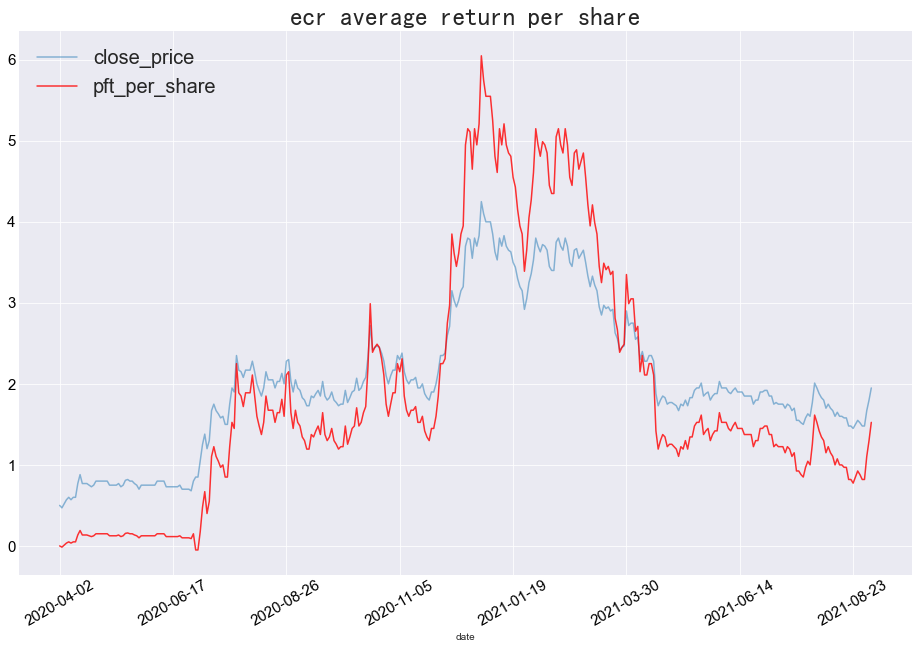

In [24]:
title = 'ecr average return per share'
plt.figure(figsize=(16,10))
plt.style.use('seaborn-darkgrid')

ecr.loc[ecr.index > '2020-04-01'].ecr_close.plot(alpha=0.5)
ecr.loc[ecr.index > '2020-04-01'].avg_prft_ps.plot(color='r', alpha=0.8)

plt.yticks(fontsize=15,color='k')
plt.xticks( fontsize=15,color='k', rotation=30)
plt.title('{}'.format(title), fontproperties = 'SimHei',fontsize=25)
plt.legend(('close_price','pft_per_share'),loc="upper left", fontsize=20 );
plt.savefig('{}'.format(title),dpi=300,bbox_inches ='tight',pad_inches = 1,transparent = True,orientation ='landscape')
plt.show()

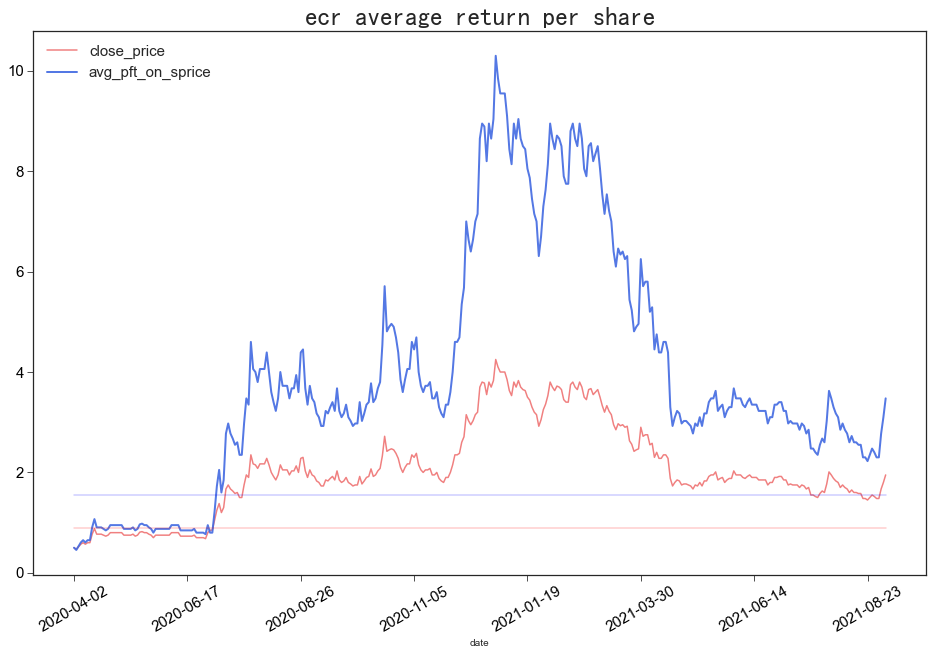

In [73]:
title = 'ecr average return per share'
plt.figure(figsize=(16,10))
plt.style.use('seaborn-pastel')

ecr.loc[ecr.index > '2020-04-01'].ecr_close.plot(color = 'lightcoral',alpha=1)
ecr.loc[ecr.index > '2020-04-01'].avg_prft_on_sprice.plot(color='royalblue', alpha=0.9,linewidth=2)
sns.lineplot( x = ecr.loc[ecr.index > '2020-04-01'].index, y=avg_sprice, color='r', ls = '--',alpha=0.2)
sns.lineplot( x = ecr.loc[ecr.index > '2020-04-01'].index, y=avg_wprice, color='b', markers='--',alpha=0.2)

plt.yticks(fontsize=15,color='k')
plt.xticks( fontsize=15,color='k', rotation=30)
plt.title('{}'.format(title), fontproperties = 'SimHei',fontsize=25)
plt.legend(('close_price','avg_pft_on_sprice'),loc="upper left", fontsize=15 );
plt.savefig('{}'.format(title),dpi=300,bbox_inches ='tight',pad_inches = 1,transparent = True,orientation ='landscape')
plt.show()
